# Assignment 3 Natural Language Processing - Part 1: Data Analysis and Preprocessing


In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('combined_mturk_mpersonality_fixed.csv')
df

,TEXT,TEXT_NL,cEXT,cNEU,cAGR,cCON,cOPN
0,"Well, right now I just woke up from a mid-day ...","Nou, op dit moment werd ik net wakker na een m...",n,y,y,n,y
1,"Well, here we go with the stream of consciousn...","Nou, hier gaan we met de stroom van bewustzijn...",n,n,y,n,n
2,An open keyboard and buttons to push. The thin...,Een open toetsenbord en knoppen om in te drukk...,n,y,n,y,y
3,I can't believe it! It's really happening! M...,Ik kan het niet geloven! Het gebeurt echt! Mij...,y,n,y,y,n
4,"Well, here I go with the good old stream of co...","Welnu, hier ga ik weer met de goede oude stroo...",y,n,y,n,y
...,...,...,...,...,...,...,...
2958,I am motivated on a day to day basis by the ne...,Ik word dagelijks gemotiveerd door de noodzaak...,y,n,n,y,y
2959,My son is the biggest part of my life and with...,Mijn zoon is het grootste deel van mijn leven ...,y,y,n,n,n
2960,My kids and grandkids are what keeps me motiva...,Mijn kinderen en kleinkinderen houden me elke ...,y,n,y,y,n
2961,My biggest drive is to earn money so I can ret...,Mijn grootste drijfveer is om geld te verdiene...,n,n,n,n,n


# Data Exploration and Analysis

Before using the data, we first need to inspect the data for any anomalies or imbalances that we need to correct for.

## Corpus

first inspect some statistics of the corpus

In [15]:
expl = df.copy()

In [60]:
# number of documents in the corpus
nr_of_docu = expl['TEXT'].nunique()
nr_of_docu

2963

Inspect the lexical variation in both corpuses

In [61]:
# Total words in the English corpus
expl['word_count'] = expl['TEXT'].apply(lambda x: len(x.split()))
total_word_count = expl['word_count'].sum()
total_word_count

1838930

In [62]:
# Total words in the Dutch corpus
expl['word_count'] = expl['TEXT_NL'].apply(lambda x: len(x.split()))
total_word_count_nl = expl['word_count'].sum()
total_word_count_nl

1908778

In [37]:
# Unique words in the English corpus
unique_words = set()

# Tokenize and count unique words in smaller chunks
chunk_size = 1000  # Adjust this value based on your available memory and DataFrame size

for i in range(0, len(expl), chunk_size):
    chunk = expl.loc[i:i+chunk_size-1]  # Get a chunk of the DataFrame
    combined_text = ' '.join(chunk['TEXT'])  # Combine text from the chunk
    chunk_words = combined_text.split()  # Tokenize the chunk
    unique_words.update(chunk_words)  # Add unique words to the set

# Count the total number of unique words
unique_word_count = len(unique_words)
unique_word_count

69539

In [38]:
# Unique words in the Dutch corpus
unique_words_nl = set()

# Tokenize and count unique words in smaller chunks
chunk_size = 1000  # Adjust this value based on your available memory and DataFrame size

for i in range(0, len(expl), chunk_size):
    chunk = expl.loc[i:i+chunk_size-1]  # Get a chunk of the DataFrame
    combined_text = ' '.join(chunk['TEXT_NL'])  # Combine text from the chunk
    chunk_words = combined_text.split()  # Tokenize the chunk
    unique_words_nl.update(chunk_words)  # Add unique words to the set

# Count the total number of unique words
unique_word_count_nl = len(unique_words_nl)
unique_word_count_nl

77126

In [39]:
# Lexical variation in English corpus
lexical_variation = unique_word_count/total_word_count
lexical_variation

0.03781492498355021

In [40]:
# Lexical variation in Dutch corpus
lexical_variation_nl = unique_word_count_nl/total_word_count_nl
lexical_variation_nl

0.0404059560619412

Average document length and outlier detections

In [41]:
#Average document length English corpus
avg_doc_length = total_word_count/nr_of_docu
avg_doc_length

620.6311171110361

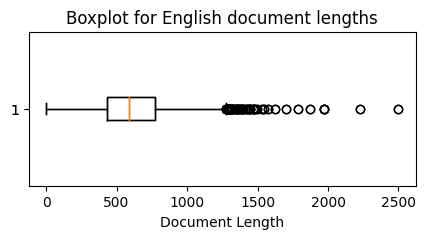

Number of outliers: 43


In [32]:
# Boxplot and outlier count for the lengths of the English corpus
expl['word_length_eng'] = expl['TEXT'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(5,2))
plt.boxplot(expl['word_length_eng'], vert=False)
boxplot_eng = plt.boxplot(expl['word_length_eng'], vert=False, showfliers=True)
plt.title('Boxplot for English document lengths')
plt.xlabel('Document Length')
plt.show()

outliers = boxplot_eng['fliers'][0].get_data()[1]
outlier_count = len(outliers)
print(f"Number of outliers: {outlier_count}")

In [42]:
#Average document length Dutch corpus
avg_doc_length_nl = total_word_count_nl/nr_of_docu
avg_doc_length_nl

644.2045224434695

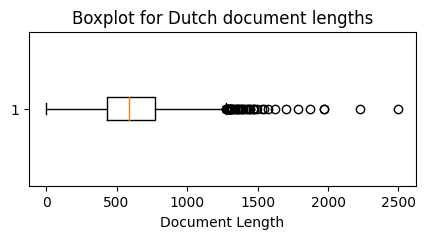

Number of outliers: 43


In [34]:
# Boxplot for the lengths of the English corpus
expl['word_length_nl'] = expl['TEXT'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(5,2))
boxplot_nl = plt.boxplot(expl['word_length_nl'], vert=False, showfliers=True)
plt.title('Boxplot for Dutch document lengths')
plt.xlabel('Document Length')
plt.show()

outliers = boxplot_nl['fliers'][0].get_data()[1]
outlier_count = len(outliers)
print(f"Number of outliers: {outlier_count}")

Based on the metrics and plots above, some insights about the texts in the dataset can be determined. In summary, the dataset has almost 3000 documents in it. Moreover, we can see that the corpus that the ratio of unique vs total words is between 3 to 4%. This indicates that there lexical variation in the corpus. Therefore, we need to reduce this by preprocessing the data.

Furthermore, it was decided to explore the lengths of the dataset. From this, it can be determined that on average, the Dutch texts are roughly 20 words longer than the English texts. This might imply that Dutch in general uses more words to express feelings etc. than the English texts. This might be something to take into account when modelling.

Finally, it was inspected if there were outliers in the texts. In total, there are 43 outliers that seem to be much longer than the average document length, with one answer containing +-2500 words. As there are only 43 outliers, it is decided to not remove these from the dataset. This is decided as longer answers might contain more detailed information which eventually might lead to better being able to identify certain personality traits.


## Target variables

Besides the corpus, we want to see the distribution of yes and no per personality traits. This way we can see how these are distributed and if we need to alter something here. As such, we plotted the distribution per class per target variable.

Besides the distributions, we also wanted to see how the target variables relate towards each other. Is it for example possible that if an answer displays a certain personality trait, other traits are less likely to also be present? By plotting a heatmap, it can be investigated how the different personality traits are correlated to each other.

Finally, we also looked into whether certain pairs of personality traits occur more often than others. As such, a cluster plot can be created to identify what clusters of personality traits occur often.


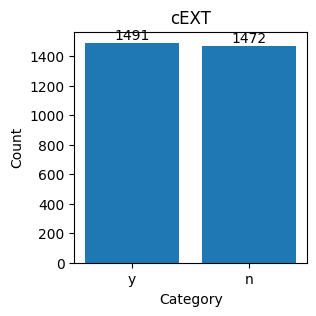

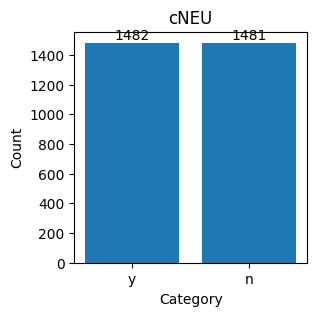

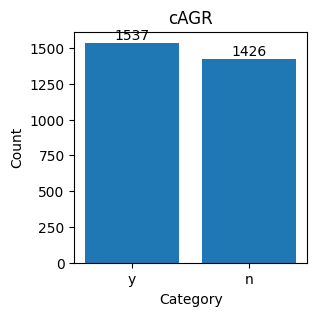

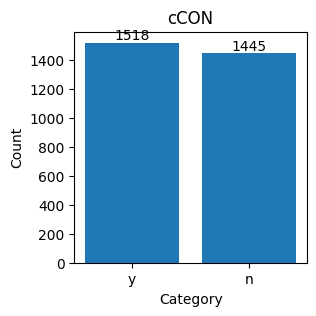

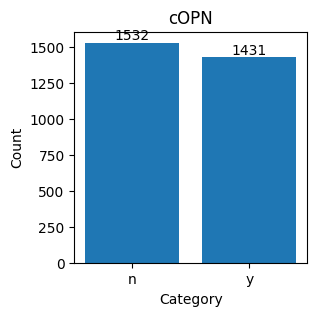

In [57]:
# Distributions
for trait in ['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']:
    category_counts = expl[trait].value_counts()
    plt.figure(figsize=(3,3))
    bars = plt.bar(category_counts.index, category_counts)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(trait)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.show()

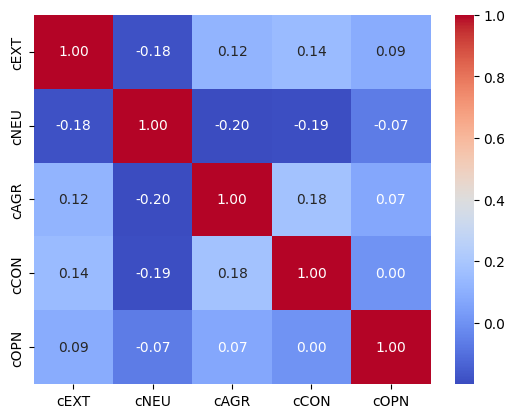

<Figure size 200x200 with 0 Axes>

In [44]:
# Correlations between traits
target_binary = expl[['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']].apply(lambda x: x.map({'y': 1, 'n': 0}))
sns.heatmap(target_binary.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.figure(figsize=(2,2))
plt.show()

<Figure size 500x500 with 0 Axes>

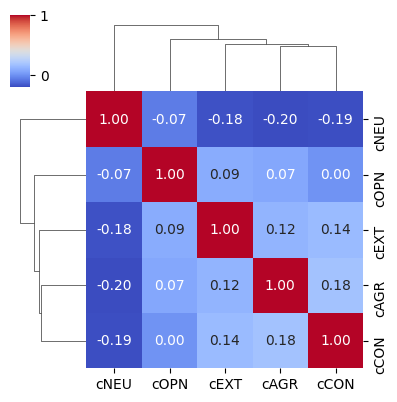

In [58]:
# Possible patterns in the traits
plt.figure(figsize=(5, 5))
sns.clustermap(target_binary.corr(), cmap='coolwarm', annot=True, fmt='.2f',  figsize=(4, 4))

plt.show()

From the distributions, we can see that for 3 of the 5 target variables, there is a very small class imbalance. This however always is +- 100 cases out of the 3000. If we were to remove cases in one class, this might lead to a (further) imbalance in other target variables. As such we decided not to remove anything as the differences are only very small

From the heatmap, the Neuroticism clearly shows some correlations. Apparently, if Neuroticism is displayed, especially Extraversion, Agreeableness and Conscientiousness are less likely to be displayed. This finding is something to take into account as Neuroticism thus is more likely to not be combined with other traits.

Finally, from the cluster plot, it can be determined that Conscientiousness and Agreeableness are the most likely to be paired together. In line with the heatmap, Neuroticism is more likely to be displayed alone.


# Preprocessing

For the traditional machine learning methods, we decided to preprocess the data. This preprocessing is not done for the deep learning methods as these do require the original corpus, without any modifications.

To begin, target variables are converted from 'y' and 'n' to 1 and 0 respectively. This was done as it makes working with the binary classification easier. Many machine learning algorithms work with numerical input and output. It thus enables machine learning algorithms that require numerical inputs to work with the target variable better.

Afterwards, we preprocess the texts inside the data frames. For this, we decided to use 'basic' techniques. the following techniques with the reasoning behind it have been used:

- Removing alphabetic characters. This is necessary as alphabetic characters, such as punctuation and special symbols, may not provide meaningful information for certain machine learning algorithms. The inclusion of them might result in noise that may make it harder for models to understand the text. Removing them thus simplifies the text and makes it easier for the models. For the dataset, this means that symbols such as commas or dots are removed and thus are not considered by the models.

- Removing stopwords. Stopwords (like 'the', 'and' and 'or') are frequent in most texts but carry little semantic meaning. This can result in models being less focused on relevant words, potentially leading to reduced prediction performance of the model. By removing them, it thus reduces the noise in the data. This allows the models to focus on more informative words that have a more significant contribution to the classification and are more representative for certain personality traits.

- Lemmatizing. In written text, many words can appear in a different form (e.g. 'work' and 'working' are the same word but in a different form). This might be confusing for the models as they are perceived by the models as different words, while they are actually the same in meaning. This then could lead to the models struggling to recognize they are the same. By lemmatizing, these words grouped such that they have an overarching word (e.g. 'working' and 'worked' are part of the 'work' lemma). These words are then replaced by that overarching word. With this, it becomes easier for the model to recognize the similarity of these words.

- Filtering out words with length less than 3. Short words, often abbreviations, may convey little information. As with the stop words, the models could become less focused on relevant words, potentially leading to reduced prediction performance of the model. Removing them helps to focus on longer words that are more likely to carry meaningful content.

Furthermore, it is important to notice that we decided to leave out lowercasing. We did not take this into account as, during lectures, it was mentioned that uppercasing often is a significant factor in human writing to for identifying personalities. In the field of linguistic typology, uppercase usage is often contextually significant and can convey aspects of emphasis or formality. As such, the usage of uppercasing can be a factor in determining certain personality traits. Therefore, it was decided to not remove uppercasing in the text, as it might be beneficial to the prediction process.

Finally, With the text processed, we saved them as CSV files, so that they could be used for the remainder of the assignment. This way we do not need to preprocess every time we use the data for a traditional machine learner, but have the processed content ready for usage. 


In [78]:
# Transform the target variables into binary
df['cEXT'] = df['cEXT'].map({'y': 1, 'n': 0})
df['cNEU'] = df['cNEU'].map({'y': 1, 'n': 0})
df['cAGR'] = df['cAGR'].map({'y': 1, 'n': 0})
df['cCON'] = df['cCON'].map({'y': 1, 'n': 0})
df['cOPN'] = df['cOPN'].map({'y': 1, 'n': 0})
df.head()

,TEXT,TEXT_NL,cEXT,cNEU,cAGR,cCON,cOPN
0,"Well, right now I just woke up from a mid-day ...","Nou, op dit moment werd ik net wakker na een m...",0,1,1,0,1
1,"Well, here we go with the stream of consciousn...","Nou, hier gaan we met de stroom van bewustzijn...",0,0,1,0,0
2,An open keyboard and buttons to push. The thin...,Een open toetsenbord en knoppen om in te drukk...,0,1,0,1,1
3,I can't believe it! It's really happening! M...,Ik kan het niet geloven! Het gebeurt echt! Mij...,1,0,1,1,0
4,"Well, here I go with the good old stream of co...","Welnu, hier ga ik weer met de goede oude stroo...",1,0,1,0,1


In [4]:
def preprocess_dataframe_content(df: pd.DataFrame, language: str) -> pd.DataFrame:
    """
    Preprocesses each entry in the 'content' column of the given DataFrame by:
    - Keeping only alphabetic characters
    - Removing stopwords
    - Lemmatizing
    - Filtering out words with length less than 3
    Tokenizes the preprocessed entry into a list of words.
    Returns a list of lists where each inner list is a tokenized and preprocessed entry from the
    'content' column of the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the 'content' column to be processed.

    Returns:
    - df (pd.DataFrame): The same DataFrame, but with the column of the specified language processed according the above techniques.
    """
    # Prepare lemmatizer and stopwords list
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words(language))

    # Preprocess the content
    
    if language == 'english':
        column = 'TEXT'
    elif language == 'dutch':
        column = 'TEXT_NL'
        
    processed_content = []
    for content in df[column]:
        # Keep only alphabetic characters and lowercased
        tokens = re.sub('[^a-zA-Z\s]', '', content.strip()).split()
        # Remove stopwords and short words, and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) >= 3]
        processed_content.append(tokens)
        
    df[column] = [' '.join(words) for words in processed_content]

    return df

In [5]:
processed_e = preprocess_dataframe_content(df, 'english')
processed_nlc = preprocess_dataframe_content(processed_e, 'dutch')
processed_nlc.head()

,TEXT,TEXT_NL,cEXT,cNEU,cAGR,cCON,cOPN
0,Well right woke midday nap Its sort weird ever...,Nou moment net wakker middagdutje Het beetje r...,0,1,1,0,1
1,Well stream consciousness essay used thing lik...,Nou gaan stroom bewustzijn essay deed soort di...,0,0,1,0,0
2,open keyboard button push The thing finally wo...,Een open toetsenbord knoppen drukken Het ding ...,0,1,0,1,1
3,cant believe Its really happening pulse racing...,geloven Het gebeurt echt Mijn pol raast gek Du...,1,0,1,1,0
4,Well good old stream consciousness assignment ...,Welnu weer goede oude stroom bewustzijnstoewij...,1,0,1,0,1


In [7]:
english_df_nlc = processed_nlc[['TEXT', 'cEXT','cNEU','cAGR','cCON','cOPN']]
dutch_df_nlc = processed_nlc[['TEXT_NL', 'cEXT','cNEU','cAGR','cCON','cOPN']]
english_df_nlc.head()

,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,Well right woke midday nap Its sort weird ever...,0,1,1,0,1
1,Well stream consciousness essay used thing lik...,0,0,1,0,0
2,open keyboard button push The thing finally wo...,0,1,0,1,1
3,cant believe Its really happening pulse racing...,1,0,1,1,0
4,Well good old stream consciousness assignment ...,1,0,1,0,1


In [8]:
processed_nlc.to_csv('processed_data_full_no_lowercasing.csv', index=False)
english_df_nlc.to_csv('processed_data_english_no_lowercasing.csv', index=False)
dutch_df_nlc.to_csv('processed_data_dutch_no_lowercasing.csv', index=False)